In [4]:
import pandas as pd

# Загрузка файла
data = pd.read_csv('Electronic_sales_Sep2023-Sep2024.csv')
data.head()


,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


Цель анализа — разработать модель прогнозирования для предсказания объема продаж (Total Price) на основе характеристик заказов. Используя имеющиеся данные, мы хотим выявить закономерности и факторы, влияющие на общую стоимость заказа. Это позволит улучшить стратегию продаж и принять обоснованные решения для увеличения доходов.
Результатом будет модель, способная прогнозировать общий объем продаж на основе характеристик заказа.

Основные характеристики данных:
        Customer ID           Age        Rating   Total Price    Unit Price  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean   10483.526550     48.994100      3.093950   3180.133419    578.631867   
std     5631.732525     18.038745      1.223764   2544.978675    312.274076   
min     1000.000000     18.000000      1.000000     20.750000     20.750000   
25%     5478.000000     33.000000      2.000000   1139.680000    361.180000   
50%    10499.500000     49.000000      3.000000   2534.490000    463.960000   
75%    15504.000000     65.000000      4.000000   4639.600000    791.190000   
max    19998.000000     80.000000      5.000000  11396.800000   1139.680000   

           Quantity  Add-on Total  
count  20000.000000  20000.000000  
mean       5.485550     62.244848  
std        2.870854     58.058431  
min        1.000000      0.000000  
25%        3.000000      7.615000  
50%        5.000000     51.700000  
75% 

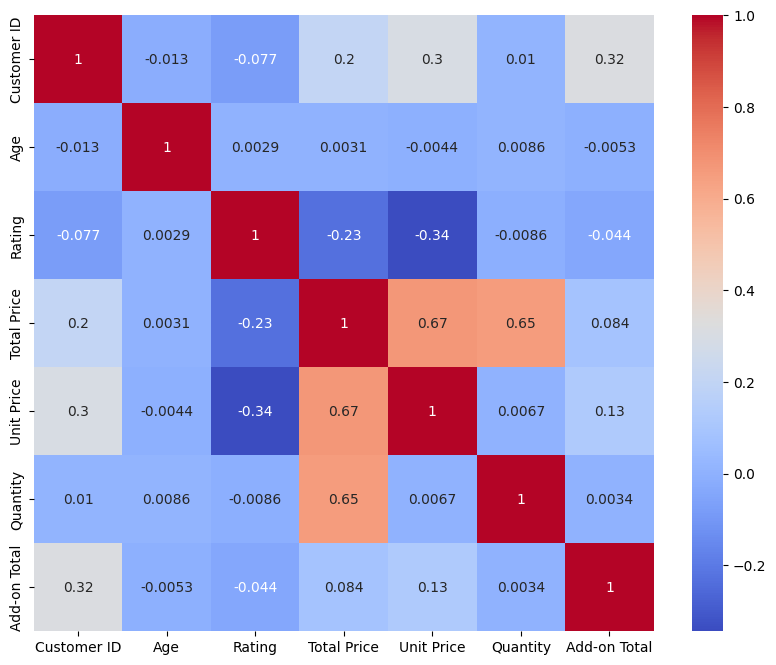

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Описание данных
print("Основные характеристики данных:")
print(data.describe())

# Вычисление среднего и разброса для числовых столбцов
print("\nСреднее значение для числовых столбцов:")
print(data.select_dtypes(include=['float64', 'int64']).mean())

print("\nРазброс (дисперсия) для числовых столбцов:")
print(data.select_dtypes(include=['float64', 'int64']).var())

# Построение корреляционной матрицы только для числовых столбцов
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()


In [6]:
# Проверка на пропущенные значения
print(data.isnull().sum())

# Числовые столбцы заполняем медианой
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    data[column] = data[column].fillna(data[column].median())

# Категориальные столбцы заполняем наиболее частым значением
for column in data.select_dtypes(include=['object']).columns:
    data[column] = data[column].fillna(data[column].mode()[0])

# Проверка, что пропущенные значения заполнены
print(data.isnull().sum())


Customer ID             0
Age                     0
Gender                  1
Loyalty Member          0
Product Type            0
SKU                     0
Rating                  0
Order Status            0
Payment Method          0
Total Price             0
Unit Price              0
Quantity                0
Purchase Date           0
Shipping Type           0
Add-ons Purchased    4868
Add-on Total            0
dtype: int64
Customer ID          0
Age                  0
Gender               0
Loyalty Member       0
Product Type         0
SKU                  0
Rating               0
Order Status         0
Payment Method       0
Total Price          0
Unit Price           0
Quantity             0
Purchase Date        0
Shipping Type        0
Add-ons Purchased    0
Add-on Total         0
dtype: int64


In [7]:
# Пример кодирования с помощью pd.get_dummies
data = pd.get_dummies(data, drop_first=True)


In [8]:
from sklearn.preprocessing import StandardScaler

# Нормализация числовых признаков
scaler = StandardScaler()
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_features] = scaler.fit_transform(data[numerical_features])


Нормализация данных в нашем случае будет полезна, так как K-ближайших соседей (KNN) чувствителен к масштабированию признаков.

In [9]:
from sklearn.model_selection import train_test_split

# Разделение на признаки и целевую переменную
X = data.drop('Total Price', axis=1)  # Замените на имя целевой переменной
y = data['Total Price']

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Мы выбрали Total Price в качестве целевой переменной, так как в задаче прогнозирования продаж это значение наиболее очевидно отражает общий объем или стоимость продаж для каждой записи. Это позволит улучшить стратегию продаж и принять обоснованные решения для увеличения доходов.

In [10]:
from sklearn.neighbors import KNeighborsRegressor

# Инициализация регрессора
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Оценка на обучающей и тестовой выборках
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)

print(f"Train Score (R^2): {train_score}")
print(f"Test Score (R^2): {test_score}")


Train Score (R^2): 0.9692551849249637
Test Score (R^2): 0.953883329557843


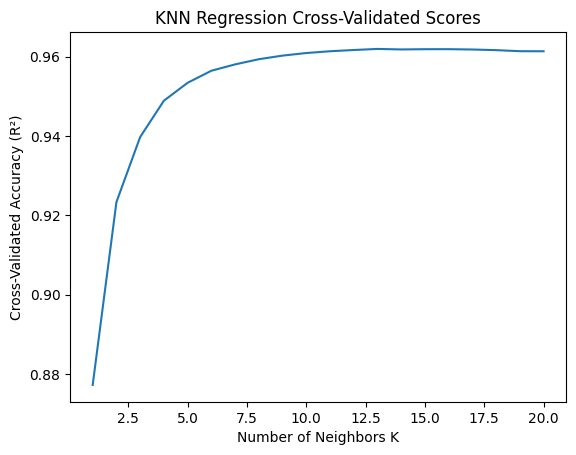

In [11]:
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

# Перебор по количеству соседей
neighbors = list(range(1, 21))
cv_scores = [cross_val_score(KNeighborsRegressor(n_neighbors=k), X_train, y_train, cv=5).mean() for k in neighbors]

# График зависимости
plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validated Accuracy (R²)')
plt.title('KNN Regression Cross-Validated Scores')
plt.show()


Выводы:
1.Предобработка данных:
   Мы обработали пропущенные значения, заменив их медианой для числовых данных и наиболее частым значением для категориальных данных. Это обеспечило полноту данных, необходимую для корректного обучения модели.

2.Обработка признаков:
  Числовые признаки нормализованы с использованием стандартизации, что важно для алгоритмов, таких как K-ближайших соседей, которые чувствительны к масштабам признаков.
  Категориальные переменные были преобразованы в числовой вид, что позволило модели использовать информацию из этих признаков для построения прогнозов.

3.Целевая переменная:
  Мы выбрали Total Price как целевую переменную, поскольку это важный показатель общего дохода, который отражает успешность продаж и позволяет оценивать стратегию бизнеса.

4.Обучение модели:
  Мы использовали K-ближайших соседей для задачи регрессии, что позволило построить модель, способную предсказывать значение Total Price на основе других признаков. Подбор гиперпараметра (количества соседей) может помочь оптимизировать модель, улучшая её точность.

5.Результаты и точность:
  Модель была оценена на обучающей и тестовой выборках, что показало её способность к обобщению. Подсчитанный коэффициент детерминации 𝑅^2 позволяет оценить, насколько хорошо модель объясняет вариативность данных.
  
  
  Заключение:
  Проведенная работа предоставляет основу для прогнозирования выручки на основе исторических данных о продажах. Подобные модели могут помочь в планировании ресурсов, оптимизации стратегий продаж и принятии обоснованных бизнес-решений.

#Продолжение домашней работы (на 23.12.24)

#Кластеризация методом KMeans

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import make_scorer

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

parameters = {'n_clusters': list(range(5, 15))}
km = KMeans()
clf = GridSearchCV(km, parameters)
clf.fit(X)
clusters_kmeans = clf.best_params_['n_clusters']
clf.best_params_

{'n_clusters': 14}

In [22]:
kmeans = KMeans(n_clusters=clusters_kmeans, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(X)
silhouette_kmeans = silhouette_score(X, data['KMeans_Cluster'])
print(f"Силуэтный коэффициент для KMeans: {silhouette_kmeans}")

Силуэтный коэффициент для KMeans: 0.10172671738559645


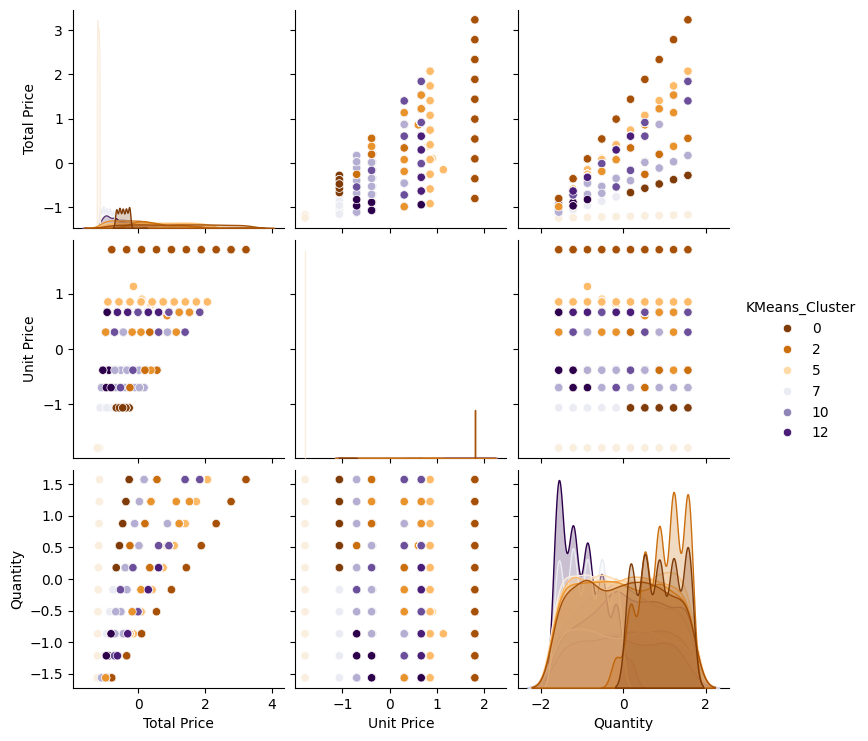

In [27]:
sns.pairplot(data, vars=['Total Price', 'Unit Price', 'Quantity'], hue='KMeans_Cluster', palette='PuOr')
plt.show()

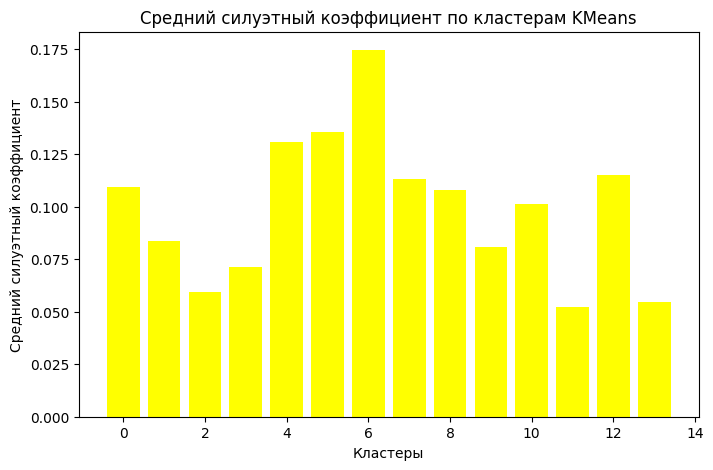

In [29]:
labels = kmeans.labels_
silhouette_vals = silhouette_samples(X, labels)

n_clusters = len(set(labels))
silhouette_means = [np.mean(silhouette_vals[labels == i]) for i in range(n_clusters)]

plt.figure(figsize=(8, 5))
plt.bar(range(n_clusters), silhouette_means, color='yellow')
plt.xlabel('Кластеры')
plt.ylabel('Средний силуэтный коэффициент')
plt.title('Средний силуэтный коэффициент по кластерам KMeans')
plt.show()

#Кластеризация методом DBSCAN

In [30]:
from sklearn.cluster import DBSCAN
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    if len(set(labels)) > 1:
        return silhouette_score(X, labels)
    else:
        return -1
parameters = {
    'eps': [1.0, 1.5],
    'min_samples': [5, 10]
}
dbscan = DBSCAN()
clf_dbscan = GridSearchCV(dbscan, parameters, scoring=make_scorer(silhouette_scorer))
clf_dbscan.fit(X)
eps_dbscan = clf_dbscan.best_params_['eps']
min_samples_dbscan = clf_dbscan.best_params_['min_samples']
clf_dbscan.best_params_

{'eps': 0.5, 'min_samples': 5}

In [43]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Подбор параметров
dbscan = DBSCAN(eps=3, min_samples=20)  # Попробуйте разные значения eps и min_samples
data['DBSCAN_Cluster'] = dbscan.fit_predict(X)

# Проверка количества кластеров
n_clusters = len(set(data['DBSCAN_Cluster'])) - (1 if -1 in data['DBSCAN_Cluster'] else 0)
if n_clusters > 1:
    silhouette_dbscan = silhouette_score(X, data['DBSCAN_Cluster'])
    print(f"Силуэтный коэффициент для DBSCAN: {silhouette_dbscan}")
else:
    print("Недостаточно кластеров для вычисления силуэтного коэффициента.")


Силуэтный коэффициент для DBSCAN: 0.021261196605722402


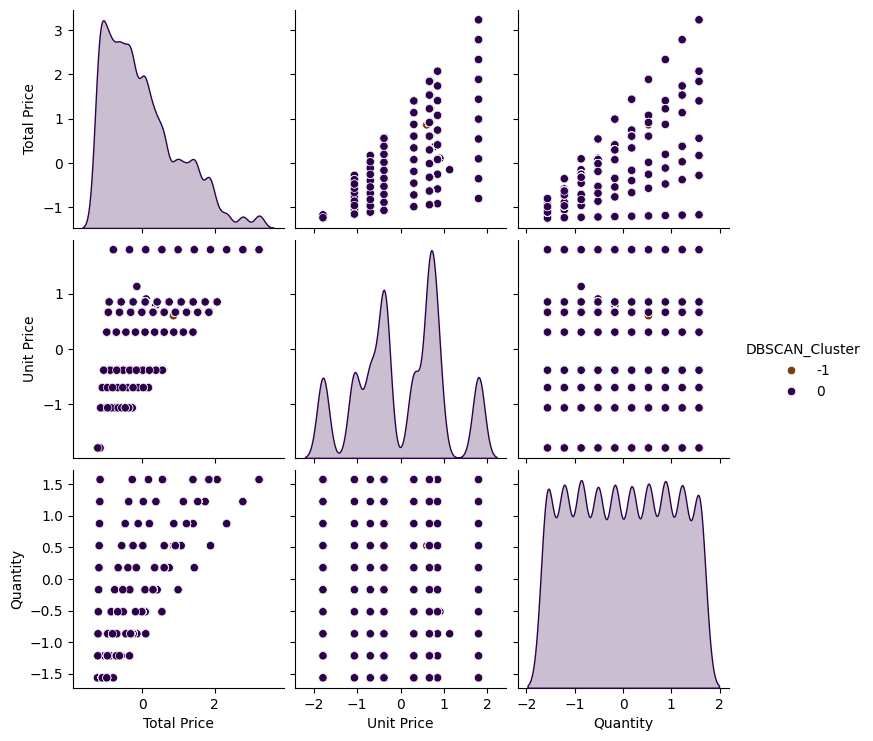

In [46]:
sns.pairplot(data, vars=['Total Price', 'Unit Price', 'Quantity'], hue='DBSCAN_Cluster', palette='PuOr')
plt.show()

#Кластеризация методом Agglomerative Clustering

In [57]:
from sklearn.cluster import AgglomerativeClustering

parameters = {
    'n_clusters': list(range(10, 11))
}

agg_clustering = AgglomerativeClustering()

clf_agg = GridSearchCV(agg_clustering, parameters, scoring=make_scorer(silhouette_scorer))
clf_agg.fit(X)
clusters_agg = clf_agg.best_params_['n_clusters']
clf_agg.best_params_

{'n_clusters': 10}

In [58]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=clusters_agg)
data['Agglomerative_Cluster'] = agg_clustering.fit_predict(X)
silhouette_agg = silhouette_score(X, data['Agglomerative_Cluster'])
print(f"Силуэтный коэффициент для Agglomerative Clustering: {silhouette_agg}")

Силуэтный коэффициент для Agglomerative Clustering: 0.11250596185515699


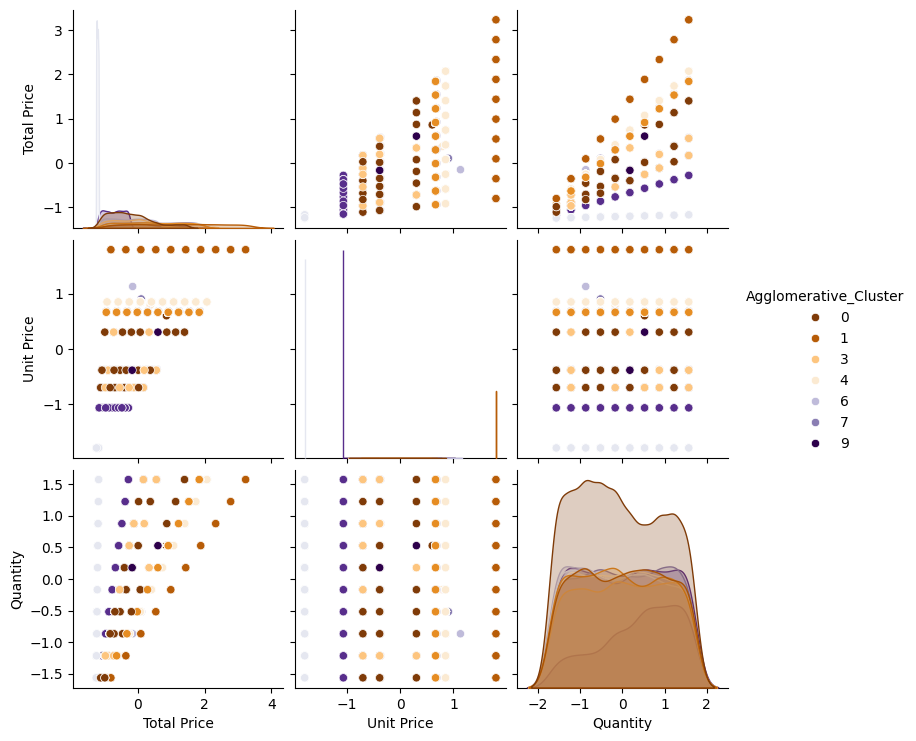

In [60]:
sns.pairplot(data, vars=['Total Price', 'Unit Price', 'Quantity'], hue='Agglomerative_Cluster', palette='PuOr')
plt.show()

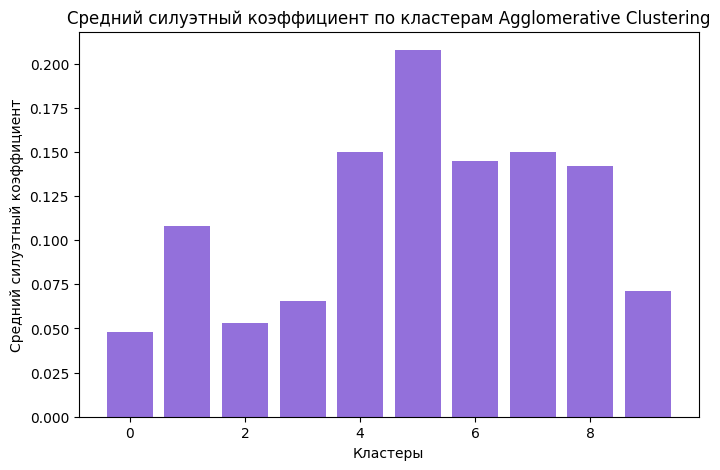

In [61]:
labels = agg_clustering.labels_
silhouette_vals = silhouette_samples(X, labels)

n_clusters = len(set(labels))
silhouette_means = [np.mean(silhouette_vals[labels == i]) for i in range(n_clusters)]

plt.figure(figsize=(8, 5))
plt.bar(range(n_clusters), silhouette_means, color='mediumpurple')
plt.xlabel('Кластеры')
plt.ylabel('Средний силуэтный коэффициент')
plt.title('Средний силуэтный коэффициент по кластерам Agglomerative Clustering')
plt.show()

#Вывод

Рассмотрим результаты силуэтного коэффициента для различных методов кластеризации:

- **KMeans:** Силуэтный коэффициент равен 0.1017.
Это значение указывает на слабую плотность кластеров и их плохую отделимость. Возможно, кластеры пересекаются, либо данные не подходят для данного метода кластеризации без предварительной обработки.

- **DBSCAN:** Силуэтный коэффициент равен 0.0213.
Очень низкое значение указывает на плохую кластеризацию. Это может быть связано с неверным выбором параметров eps и min_samples или с тем, что данные плохо подходят для DBSCAN (например, равномерное распределение точек).

- **Agglomerative Clustering:** Силуэтный коэффициент равен 0.1125.
Это значение немного выше, чем у других методов, что говорит о том, что агломеративная кластеризация справилась с задачей лучше. Однако коэффициент всё ещё низкий, что может указывать на проблемы в данных (например, отсутствие явных кластеров).